# Question 1
- There are two models, M1 and M2, used to predict the scores for some input data. Suppose M1 predicts the score for input data as score1.npy and M2 predicts the score for the same data as score2.npy. Actual labels for a given score is label.npy
(use np.load to load .npy files)
1. Plot ROC curve (from scratch) for both the models in a single plot. (10 marks)
2. Explain which model performs better on this data and why? (5 marks)
3. Compute AUC for both the ROC curves. (5 marks)
4. Calculate true positive rate for both models when false acceptance rate is 10% (5 marks)
5. Draw your analysis on (3) and (4) (5 marks)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## importing data
y_actual = np.load("label.npy")
model1_pred = np.load("score1.npy"); model2_pred = np.load("score2.npy")

## getting shape
y_actual.shape, model1_pred.shape, model2_pred.shape

((25046,), (25046,), (25046,))

##### 1. Plot ROC curve (from scratch) for both the models in a single plot. (10 marks)

In [3]:
def tpr_fpr_calculation(actual, predicted, threshold):
    """
    This function calculates tpr and fpr from tp,fp,fn,tn values.
    """
    ## getting true_positive, false_negative, false_positive, and false_negative
    true_pos = len([(1,1) for y, y_cap in zip(actual, predicted) if (y == 1) and (y_cap >= threshold)])
    true_neg = len([(0,0) for y, y_cap in zip(actual, predicted) if (y == 0) and (y_cap < threshold)])
    false_pos = len([(0,1) for y, y_cap in zip(actual, predicted) if (y == 0) and (y_cap >= threshold)])
    false_neg = len([(1,0) for y, y_cap in zip(actual, predicted) if (y == 1) and (y_cap < threshold)])
    
    ## calculating tpr and fpr
    tpr = true_pos/(true_pos + false_neg)
    fpr = false_pos/(false_pos + true_neg)
    
    return tpr, fpr

In [4]:
def roc_scores(actual, predicted, total_threshold=100):
    """This function calculates the roc_score for different threshold."""
    score = np.array(list()) ## intiliazing score array to store roc score
    for thr in range((max(actual)+1)*total_threshold): ## iterating over ta range of threshold
        ## getting tpr and fpr at threshold
        tpr_tr, fpr_tr = tpr_fpr_calculation(actual, predicted, thr/total_threshold)
        ## appending the score to the score array iteself
        score = np.append(score, [fpr_tr, tpr_tr])
        
    return score.reshape(-1,2) ## reshaping data to get the x and y values

In [5]:
## getting roc scores for both the model
roc_model1 = roc_scores(y_actual, model1_pred, total_threshold=100)
roc_model2 = roc_scores(y_actual, model2_pred, total_threshold=100)

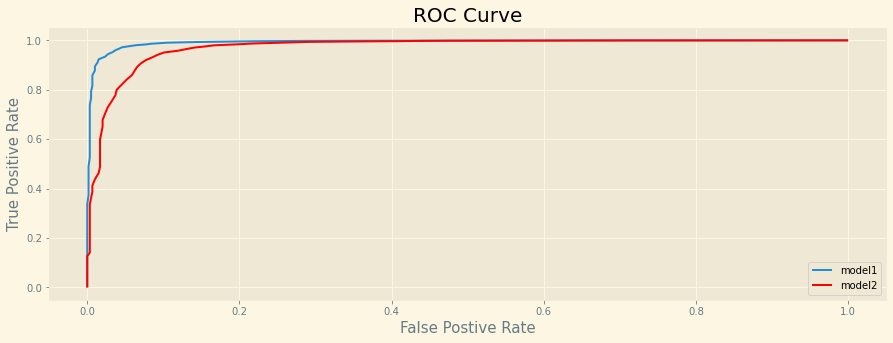

In [6]:
## plotting the curve for both model 1 and model 2 
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize=(15,5))
## plotting the model's fpr and tpr score
ax1 = plt.plot(roc_model1[:,0], roc_model1[:,1])
ax2 = plt.plot(roc_model2[:,0], roc_model2[:,1], "r")
## setting up title and labels
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Postive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(["model1", "model2"])
plt.show()

##### 2. Explain which model performs better on this data and why? (5 marks)

##### answer:

    Roc curve is trade off between sensitivity(tpr) and specificity(fpr). The higher value of sensitivity(tpr) 
    for less value of specificity(fpr) the better the model's performance. It means if the curve is more towards 
    top left cornor, then it will indicate better model performance.

    So are compared between model1 and model2, model1 is covering more area in the graph along with more towards 
    top left cornor. So model1 performs better than model2.

##### 3. Compute AUC for both the ROC curves. (5 marks)

In [7]:
def auc_score(fpr, tpr):
    """This function calculates the auc score for the given tpr and fpr values."""
    return sum([(fpr[num]- fpr[num + 1]) * tpr[num] for num in range(len(tpr)-1)])

In [8]:
##calculating auc scores
model1 = auc_score(roc_model1[:,0], roc_model1[:,1])
model2 = auc_score(roc_model2[:,0], roc_model2[:,1])
print("auc score : model1 : {:.4f}, model2 : {:.4f}".format(model1, model2))

auc score : model1 : 0.9929, model2 : 0.9731


#####  4. Calculate true positive rate for both models when false acceptance rate is 10% (5 marks)

In [9]:
def get_tpr_give_far(fpr, tpr, threshold):
    """this function fetches tpr for false acceptance rate"""
    return tpr[np.where(threshold == fpr.round(2))[0][0]]

In [10]:
tpr_model1 = get_tpr_give_far(roc_model1[:,0], roc_model1[:,1], 0.10)
tpr_model2 = get_tpr_give_far(roc_model2[:,0], roc_model2[:,1], 0.10)

print("The true positive rate when false acceptance rate is 10% for both the model is -- ")
print("model1_tpr : {:.4f}, model2_tpr : {:.4f}".format(tpr_model1, tpr_model2))

The true positive rate when false acceptance rate is 10% for both the model is -- 
model1_tpr : 0.9903, model2_tpr : 0.9508


##### 5. Draw your analysis on (3) and (4) (5 marks)

    The auc score of model1 is alomst 100% whereas the model2 has 97.31%. That means model1 is performing better
    than model2.
    
    For 10% false acceptance rate means out of 100 times we are accepting 10 times false postive values. So for
    given threshold the model1 has sensitivity of 99% which is good and model2 has 95%, less as compared to model1.

# Question 2
- Dataset link: Link


Consider a fingerprint recognition dataset, having 600 images in the gallery and 9854 images in the probe. A model is used to classify probe images into 600 classes. The probabilities predicted by the model for all 600 gallery images are given in score.npy. The correct labels are given in label.npy.

In [11]:
## importing data
y_actual = np.load("label.npy")
y_predicted = np.load("score.npy")

##### 1. Plot CMC curve up to rank 10.

In [16]:
def calculate_cmc_score(actual, predicted, rank=10):
    
    ## sorting the array based on values to get the indexes in descending order 
    sorted_arr = np.array([(sorted([(val, idx) for idx, val in enumerate(v)], reverse=True)) 
                           for i, v in enumerate(predicted)])
    ## getting index of labels of actual data
    actual_arr = np.argmax(actual, axis=1)
    
    ## initializing ranks
    rank_arr = np.zeros(sorted_arr.shape[0])
    
    ## looping for all datapoints
    for dp in range(sorted_arr.shape[0]):
        ## getting the number after which the output is correct
        place = np.argmax(sorted_arr[dp][:,1] == actual_arr[dp])
        ## updating the ranks
        for val in range(place, sorted_arr.shape[0]):
            rank_arr[val] += 1
    ## getting cmc scores
    cmc_scores = rank_arr / sorted_arr.shape[0]
    
    ## plot with given topk rank
    plt.style.use('Solarize_Light2')
    fig = plt.figure(figsize=(10,5))
    ax = plt.plot(range(1,rank+1), cmc_scores[0:rank])
    plt.title("CMC Curve", fontsize=20)
    plt.xlabel("rank(n)")
    plt.ylabel("identification rate")
    return plt.show()

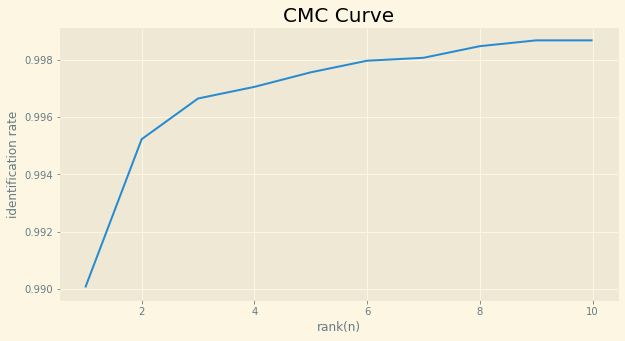

In [17]:
calculate_cmc_score(y_actual, y_predicted, rank=10)

##### 2. Comment on the results.

From the above cmc curve with top 10 rank we can interpret that that probability of getting correct result at top 10 images is more than 99.8%. That means from the top 10 images only we are going to get almost 100% accuracy from the model.